### Code to look at a specific brown dwarf and see if there are any astrometric microlensing events in the near future.

In [1]:
# add path to module so can import
import sys
sys.path = ['/users/judah/mlfinder'] + sys.path

# basic imports
from astropy.io import ascii
from astropy.table import Table

# import module
from mlfinder.bd import BrownDwarf
from mlfinder.fields import Fields
from mlfinder.events import FindEvents

**Getting my brown dwarf data...**

In [2]:
candidate_stars = ascii.read('apjsaaf6aft4_ascii.txt', format='tab')
candidate_stars.keep_columns(['(1)', '(2)', '(4)', '(6)', '(8)', '(9)'])

candidate_stars.rename_column('(1)', 'object_name')
candidate_stars.rename_column('(2)', 'ra')
# candidate_stars.rename_column('(3)', 'ra_unc')
candidate_stars.rename_column('(4)', 'dec')
# candidate_stars.rename_column('(5)', 'dec_unc')
candidate_stars.rename_column('(6)', 'pi')
candidate_stars.rename_column('(8)', 'mu_alpha')
candidate_stars.rename_column('(9)', 'mu_delta')

brown_dwarf = Table(candidate_stars[list(candidate_stars['object_name']).index('WISE 0855-0714')])

# temp fixes for test
brown_dwarf['pi'] = 438.9
brown_dwarf['mu_alpha'] = -8118.9
brown_dwarf['mu_delta'] = 679.3

**Creating the brown dwarf class, fields class, and getting the events.**

In [3]:
bd = BrownDwarf(brown_dwarf)

bd_path = bd.find_path(start='2020-Jan-01', end='2030-Jan-01')

In [4]:
stars = Fields(bd=bd, file=r'C:\Users\judah\candidate_stars_background\dr8\0855-0714_bs.txt')

In [5]:
events = FindEvents(bd, stars, 5)

events.event_table

,decals_id,ra,dec,dered_mag_r,gaia_pointsource,time,bd_ra,bd_dec,sep,delta_ml
0,7.696600e+15,-0.001426,0.000926,22.0466,0.0,2020.666667,-0.001463,0.000140,2.834455,166.105416
1,7.696600e+15,-0.015178,0.001579,20.9807,0.0,2026.747433,-0.015240,0.001282,1.090253,63.891282


**Taking a look at the plot of the dwarf itself:**

**Note I set *gaia_check=True* because I was checking how many background stars were *Gaia* pointsources.**

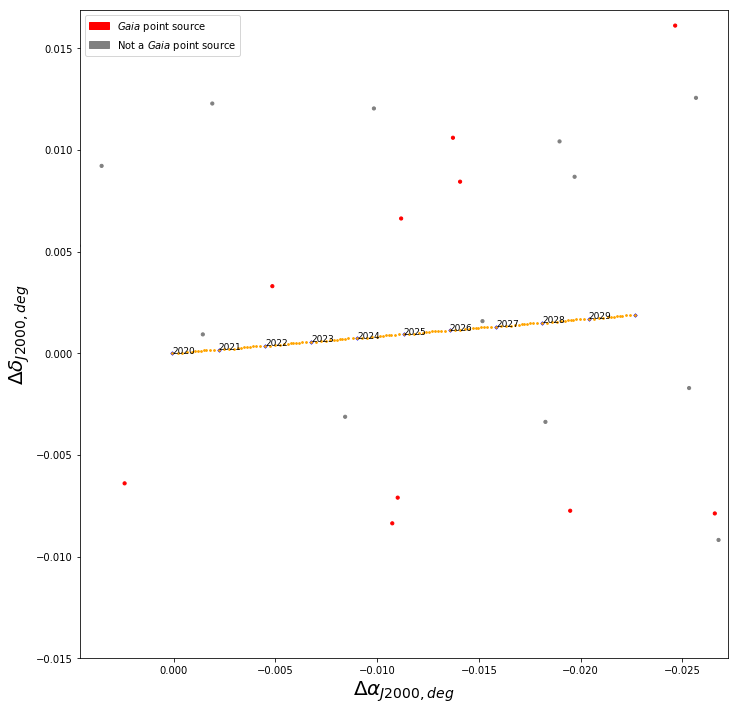

In [6]:
event_path_fig = events.plot_event_path(gaia_check=True)

**That looks good, so let's move onto the centroid shift.**

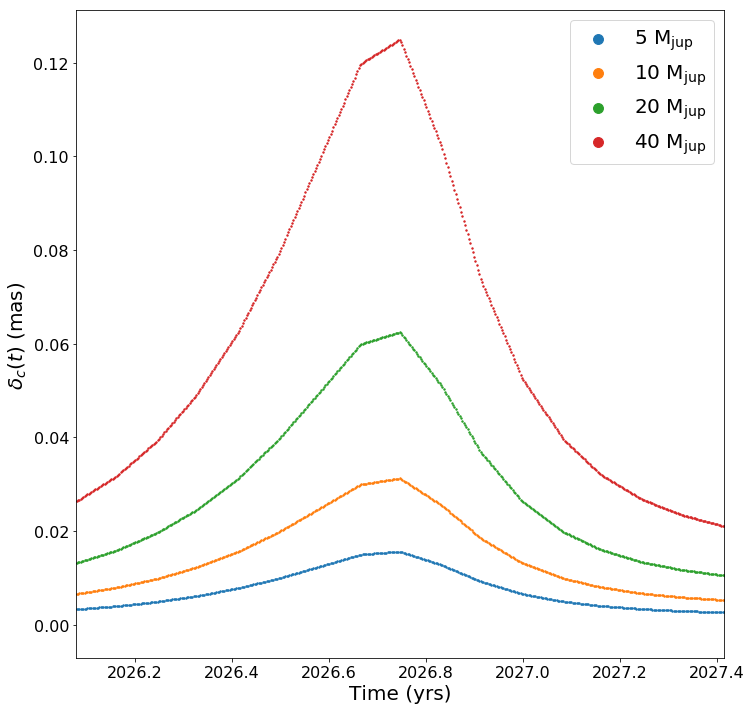

In [7]:
shift = events.centroid_shift(which=1)

centroid_shift_fig = events.plot_shift()